__与门的实现__

In [1]:
# AND
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

__导入权重和偏置__

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def AND(x1,x2):
    x = np.array(x1,x2)
    w = np.array(0.5,0.5)
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

__NAND__

In [4]:
def NAND(x1,x2):
    x = np.array(x1,x2)
    w = np.array(-0.5, -0.5)    
    b = 0.7
    
    tmp = np.sum(w*x)+b
    
    if tmp <= 0:
        return 0
    if tmp > 0:
        return 1

__OR__

In [5]:
def OR(x1,x2):
    x = np.array(x1,x2)
    w = np.array(0.5,0.5)
    b = -0.2
    
    tmp = np.sum(w*x)+b
    
    if tmp <=0:
        return 0
    if tmp >0:
        return 1

__XOR__

In [6]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

__阶跃函数__

In [7]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

__阶跃函数的数组形式__

In [8]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

__阶跃函数的图像__

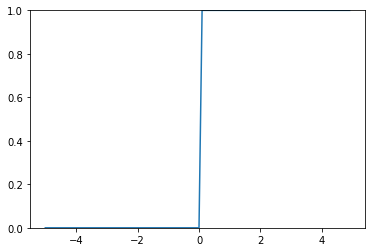

In [9]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5,5,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0,1,1,1)
plt.show()

__sigmoid function__

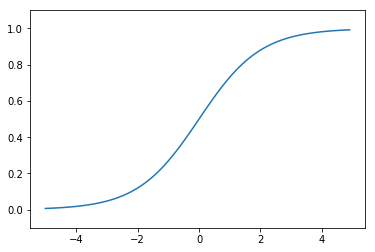

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

__relu function__

In [11]:
def relu(x):
    return np.maximum(0,x)

__矩阵乘法__

在矩阵乘法中，对应的维度元素个数要一致

In [14]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

np.dot(A,B)

array([[19, 22],
       [43, 50]])

# 神经网络的内积

In [18]:
X = np.array([1,2])

W = np.array([[1,3,5],[2,4,6]])

Y = np.dot(X,W)

print(Y)

[ 5 11 17]


## 三层神经网络的实现

从输入层到第一层

In [28]:
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1)+B1

Z1 = sigmoid(A1)

Z1

array([0.57444252, 0.66818777, 0.75026011])

从第一层到第二层

In [30]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2) + B2

Z2 = sigmoid(A2)

Z2

array([0.62624937, 0.7710107 ])

从第二层到输出层的信号传递

In [35]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+B3

Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

# 代码小结

In [36]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) +b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


## softmax 函数

In [43]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

## 矫正溢出问题

$$\frac{exp(a_k)}{\Sigma^n_{i=1}exp(a_i)}=\frac{Cexp(a_k)}{C\Sigma^n_{i=1}exp(a_i)}=\frac{exp(a_k + C')}{\Sigma^n_{i=1}exp(a_i+C')}$$

In [46]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [47]:
import struct

## load mnist

In [96]:
def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'   #'>IIII'是说使用大端法读取4个unsinged int32
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print ('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    print("offset: ",offset)
    fmt_image = '>' + str(image_size) + 'B'   # '>784B'的意思就是用大端法读取784个unsigned byte
    images = np.empty((num_images, num_rows*num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print( '已解析 %d' % (i + 1) + '张')
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows*num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print ('魔数:%d, 图片数量: %d张' % (magic_number, num_images))

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print( '已解析 %d' % (i + 1) + '张')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


In [97]:
train_image = './data/mnist/train-images.idx3-ubyte'
test_image = './data/mnist/t10k-images.idx3-ubyte'
train_label = './data/mnist/train-labels.idx1-ubyte'
test_label = './data/mnist/t10k-labels.idx1-ubyte'

In [98]:
train_images = decode_idx3_ubyte(idx3_ubyte_file=train_image)
test_images = decode_idx3_ubyte(idx3_ubyte_file=test_image)
train_labels = decode_idx1_ubyte(idx1_ubyte_file=train_label)
test_labels = decode_idx1_ubyte(idx1_ubyte_file=test_label)

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
offset:  16
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
offset:  16
已解析 10000张
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2049, 图片数量: 10000张
已解析 10000张


## show first image

In [86]:
from PIL import Image

In [90]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

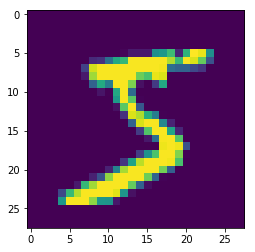

In [103]:
plt.imshow(train_images[0].reshape([28,28]))

## 批处理

先把书中的预制参数加载进来

In [108]:
import pickle

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y
 

In [119]:
network = init_network()

y = predict(network,test_images)
accuracy=0

for i in range(len(y)):
    p = np.argmax(y[i])
    if p==test_labels[i]:
        accuracy +=1
        
accuracy/10000

0.9207

In [120]:
batch_size = 100

accuracy_cnt = 0

for i in range(0,len(test_images),batch_size):
    x_batch = test_images[i:i+batch_size]
    y_batch = predict(network,x_batch)
    
    p = np.argmax(y_batch, axis=1)
    
    accuracy_cnt += np.sum(p == test_labels[i:i+batch_size])

In [121]:
accuracy_cnt/10000

0.9207

## 损失函数

In [126]:
## 均方误差
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

def mse(y,t):
    return 0.5*np.sum((y-t)**2)

In [124]:
## 交叉熵误差
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

mse(np.array(y),np.array(t))

mini-batch 学习

In [131]:
train_size = train_images.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = train_images[batch_mask]
t_batch = train_labels[batch_mask]

In [142]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

## 数值微分

利用微小差分求导数的过程称为数值微分。
前后各取$10^{-4}$比较合适

举例如下：
$$y=0.01x^2+0.1x$$

In [144]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [147]:
def numerical_diff(f,x):
    h = 1e-4
    return(f(x+h)-f(x-h))/(2*h)

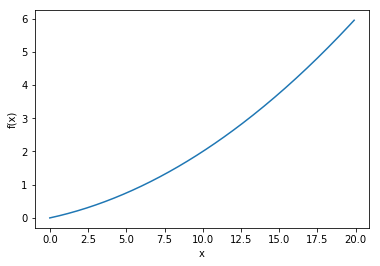

In [148]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [149]:
numerical_diff(function_1,5)

0.1999999999990898

## 偏导数

举例如下：

$$f(x_0,x_1)=x^2_0+x_1^2$$

In [152]:
def function_2(x):
    return x[0]**2 + x[1]**2

## 求 x0=3， x1=4时的两个偏导数
def function_tmp1(x0):
    return x0*x0 + 4.0**2
numerical_diff(function_tmp1,3)

def function_tmp2(x1):
    return 3**2 + x1*x1
numerical_diff(function_tmp2,4)

7.999999999999119

## 梯度

In [7]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

## 梯度下降法

In [8]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x

## 用梯度下降法求最值

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])